# Import libraries & PreProcessing data .. 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report

In [2]:
data = pd.read_csv("/kaggle/input/titanic/test.csv")

In [3]:
data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
data.shape

(418, 12)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 418 entries, 0 to 417

Data columns (total 12 columns):

 #   Column       Non-Null Count  Dtype  

---  ------       --------------  -----  

 0   PassengerId  418 non-null    int64  

 1   Survived     418 non-null    int64  

 2   Pclass       418 non-null    int64  

 3   Name         418 non-null    object 

 4   Sex          418 non-null    object 

 5   Age          332 non-null    float64

 6   SibSp        418 non-null    int64  

 7   Parch        418 non-null    int64  

 8   Ticket       418 non-null    object 

 9   Fare         417 non-null    float64

 10  Cabin        91 non-null     object 

 11  Embarked     418 non-null    object 

dtypes: float64(2), int64(5), object(5)

memory usage: 39.3+ KB


In [6]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [7]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

<AxesSubplot:>

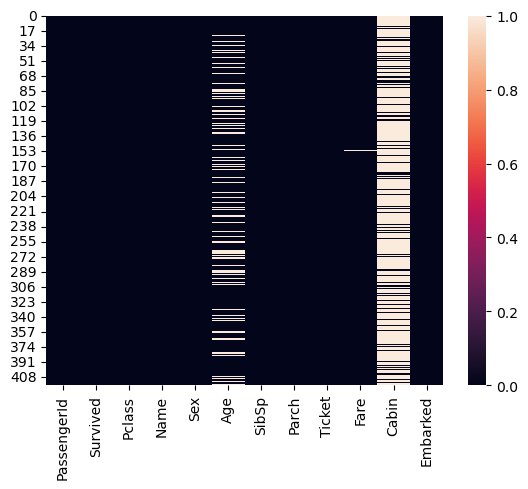

In [8]:
sns.heatmap(data.isnull())

<AxesSubplot:xlabel='Embarked', ylabel='count'>

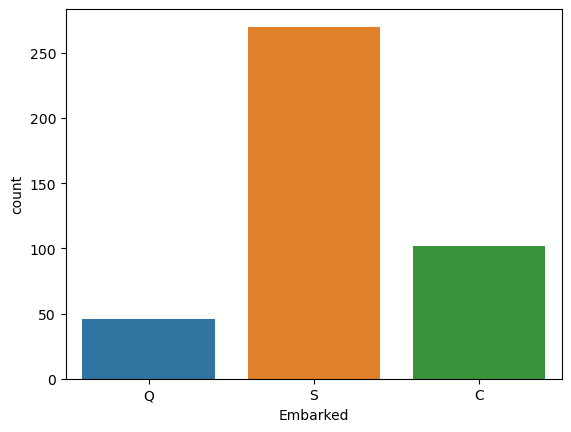

In [9]:
sns.countplot(data=data,x="Embarked")

In [10]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [11]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [12]:
data1= data.drop(['Name','Ticket','Cabin','PassengerId'],axis=1)
data1

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,34.5,0,0,7.8292,Q
1,1,3,female,47.0,1,0,7.0000,S
2,0,2,male,62.0,0,0,9.6875,Q
3,0,3,male,27.0,0,0,8.6625,S
4,1,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...,...
413,0,3,male,NaN,0,0,8.0500,S
414,1,1,female,39.0,0,0,108.9000,C
415,0,3,male,38.5,0,0,7.2500,S
416,0,3,male,NaN,0,0,8.0500,S


In [13]:
gender=pd.get_dummies(data1["Sex"],drop_first=True)
gender

,male
0,1
1,0
2,1
3,1
4,0
...,...
413,1
414,0
415,1
416,1


In [14]:
emb = pd.get_dummies(data1["Embarked"],drop_first=True)
emb

,Q,S
0,1,0
1,0,1
2,1,0
3,0,1
4,0,1
...,...,...
413,0,1
414,0,0
415,0,1
416,0,1


In [15]:
data1

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,34.5,0,0,7.8292,Q
1,1,3,female,47.0,1,0,7.0000,S
2,0,2,male,62.0,0,0,9.6875,Q
3,0,3,male,27.0,0,0,8.6625,S
4,1,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...,...
413,0,3,male,NaN,0,0,8.0500,S
414,1,1,female,39.0,0,0,108.9000,C
415,0,3,male,38.5,0,0,7.2500,S
416,0,3,male,NaN,0,0,8.0500,S


In [16]:
data1.drop("Embarked",axis=1 , inplace=True)
data1

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,34.5,0,0,7.8292
1,1,3,female,47.0,1,0,7.0000
2,0,2,male,62.0,0,0,9.6875
3,0,3,male,27.0,0,0,8.6625
4,1,3,female,22.0,1,1,12.2875
...,...,...,...,...,...,...,...
413,0,3,male,NaN,0,0,8.0500
414,1,1,female,39.0,0,0,108.9000
415,0,3,male,38.5,0,0,7.2500
416,0,3,male,NaN,0,0,8.0500


In [17]:
data1.drop("Sex",axis=1 , inplace=True)
data1

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,34.5,0,0,7.8292
1,1,3,47.0,1,0,7.0000
2,0,2,62.0,0,0,9.6875
3,0,3,27.0,0,0,8.6625
4,1,3,22.0,1,1,12.2875
...,...,...,...,...,...,...
413,0,3,NaN,0,0,8.0500
414,1,1,39.0,0,0,108.9000
415,0,3,38.5,0,0,7.2500
416,0,3,NaN,0,0,8.0500


In [18]:
df=pd.concat([data1,gender,emb], axis=1)

In [19]:
df

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,34.5,0,0,7.8292,1,1,0
1,1,3,47.0,1,0,7.0000,0,0,1
2,0,2,62.0,0,0,9.6875,1,1,0
3,0,3,27.0,0,0,8.6625,1,0,1
4,1,3,22.0,1,1,12.2875,0,0,1
...,...,...,...,...,...,...,...,...,...
413,0,3,NaN,0,0,8.0500,1,0,1
414,1,1,39.0,0,0,108.9000,0,0,0
415,0,3,38.5,0,0,7.2500,1,0,1
416,0,3,NaN,0,0,8.0500,1,0,1


In [20]:
df.rename(columns={'male' :'Gender' }, inplace =True)
df

,Survived,Pclass,Age,SibSp,Parch,Fare,Gender,Q,S
0,0,3,34.5,0,0,7.8292,1,1,0
1,1,3,47.0,1,0,7.0000,0,0,1
2,0,2,62.0,0,0,9.6875,1,1,0
3,0,3,27.0,0,0,8.6625,1,0,1
4,1,3,22.0,1,1,12.2875,0,0,1
...,...,...,...,...,...,...,...,...,...
413,0,3,NaN,0,0,8.0500,1,0,1
414,1,1,39.0,0,0,108.9000,0,0,0
415,0,3,38.5,0,0,7.2500,1,0,1
416,0,3,NaN,0,0,8.0500,1,0,1


# Data Analysis .. #


<AxesSubplot:xlabel='SibSp', ylabel='count'>

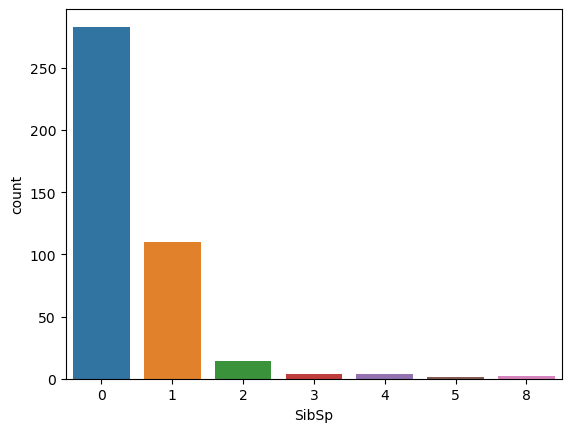

In [21]:
sns.countplot(x='SibSp' , data = df  )

<AxesSubplot:xlabel='Parch', ylabel='count'>

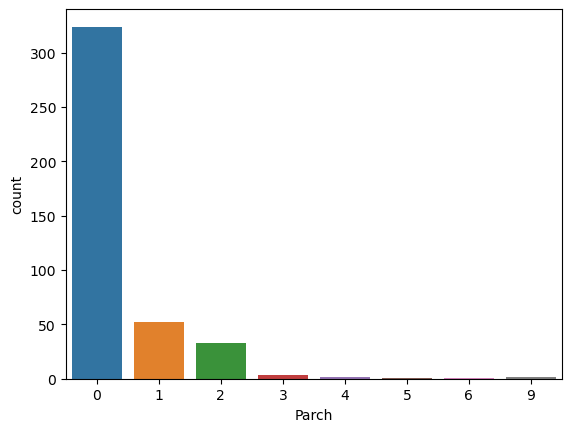

In [22]:
sns.countplot(x='Parch' , data = df  )

<AxesSubplot:>

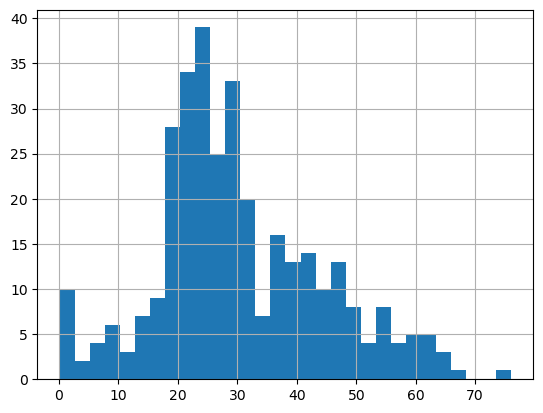

In [23]:
df["Age"].hist(bins=30)

<AxesSubplot:>

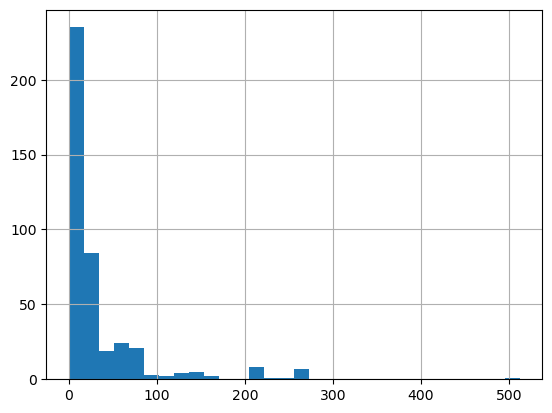

In [24]:
df["Fare"].hist(bins=30)

# Spliting Data .. #

In [26]:
data = ['Pclass' , 'SibSp' , 'Parch',  'Gender','Q','S']
x= df[data]

y= df['Survived']

In [27]:
x_train, x_test , y_train , y_test = train_test_split ( x, y, test_size=0.2)

In [28]:
x_train.shape

(334, 6)

In [29]:
y_train.shape

(334,)

In [30]:
y_train.shape

(334,)

In [31]:
y_test.shape

(84,)

In [32]:
model = LogisticRegression(max_iter=5000)

In [33]:
model.fit(x_train,y_train)

LogisticRegression(max_iter=5000)

In [34]:
y_pred =model.predict(x_test)

In [35]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support



           0       1.00      1.00      1.00        56

           1       1.00      1.00      1.00        28



    accuracy                           1.00        84

   macro avg       1.00      1.00      1.00        84

weighted avg       1.00      1.00      1.00        84




# THANK YOU ..